# DS 210 Homework 1

# **Collaborators: None**

# Question 1 All about Markdown

Create a Markdown cell that roughly looks like the content of the following box

# Title

## Section 1: Different Fonts

Regular **Bold** _Italic_.

## Section 2: Enumeration

- First bullet
- Second bullet
    1. A
    2. B
- Third bullet
    - Sub-bullet
    - Sub-bullet
 
## Section 3: Code

This is inline code: `x*x for x in X`, and this is a block of code (note the syntax hightling!)

```
#comment
def foo(x, y, z):
    return x + 10 * y + 100 *z
    
```



# Question 2

Execute a simple data pipeline that involves the following steps:
1. Basic data validation (i.e., make sure no relevant attributes are missing) and—if needed—data cleansing.
2. Partitioning the data set into a training and test set.
3. Selection of the set of features that will be used in the learning process.
4. Training a decision tree.
5. Estimation of the quality of predictions by the final decision tree.

Execute this pipeline for different target decision tree sizes and different sizes of the set of features used for learning and prediction.
- For the former, you can try various numbers of nodes that are multiples of 5.
- For the latter, you can select 3, 6, 9, etc. that you believe should be most important for what you are trying to predict.

Compare the outcomes and plot a graph that displays the prediction accuracy.

We can use this dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Data Preparation


In [ ]:
# Import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# For Google Colab User Only

# Files uploadd

from google.colab import files
files.upload()

In [ ]:
# Read the data
# Choose the 'student-mat.csv' since Math is obviouosly a better subject compared to Portuguese

data = pd.read_csv('student-mat.csv', sep=';')

In [ ]:
# Overview of the dataset

data.head

In [ ]:
# Check the features' data types

data.dtypes

# Data Cleansing

In [ ]:
# Check for missing values

def check_missing_values(data):
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            print("There are missing values in column: ", column)
            print("Number of missing values: ", data[column].isnull().sum())
        else:
            print("There are no missing values in column: ", column)

check_missing_values(data)

In [ ]:
# Check for duplicates

def check_duplicates(data):
    if data.duplicated().sum() > 0:
        print("There are duplicates in the data")
        print("Number of duplicates: ", data.duplicated().sum())
    else:
        print("There are no duplicates in the data")

check_duplicates(data)

There are no duplicates in the data


In [ ]:
# Check for outliers

def check_outliers(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            continue
        else:
            if data[column].quantile(0.75) - data[column].quantile(0.25) > 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)):
                print("There are outliers in column: ", column)
                print("Number of outliers: ", data[column].quantile(0.75) - data[column].quantile(0.25) > 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)).sum())
            else:
                print("There are no outliers in column: ", column)

check_outliers(data)

In [ ]:
# Check for skewness

def check_skewness(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            continue
        else:
            if data[column].skew() > 1:
                print("There is skewness in column: ", column)
                print("Skewness: ", data[column].skew())
            else:
                print("There is no skewness in column: ", column)

check_skewness(data)

In [ ]:
# We do not need G1 and G2 for the prediction of G3, so we will drop them

data = data.drop(['G1', 'G2'], axis=1)

In [ ]:
# For the columns that are categorical, we will convert them to dummy variables
# We will use the get_dummies function from pandas

# Convert school to dummy variables
data = pd.get_dummies(data, columns=['school'])

# Convert sex to dummy variables
data = pd.get_dummies(data, columns=['sex'])

# Convert address to dummy variables
data = pd.get_dummies(data, columns=['address'])

# Convert famsize to dummy variables
data = pd.get_dummies(data, columns=['famsize'])

# Convert Pstatus to dummy variables
data = pd.get_dummies(data, columns=['Pstatus'])

# Convert Mjob to dummy variables
data = pd.get_dummies(data, columns=['Mjob'])

# Convert Fjob to dummy variables
data = pd.get_dummies(data, columns=['Fjob'])

# Convert reason to dummy variables
data = pd.get_dummies(data, columns=['reason'])

# Convert guardian to dummy variables
data = pd.get_dummies(data, columns=['guardian'])

# Convert schoolsup to dummy variables
data = pd.get_dummies(data, columns=['schoolsup'])

# Convert famsup to dummy variables
data = pd.get_dummies(data, columns=['famsup'])

# Convert paid to dummy variables
data = pd.get_dummies(data, columns=['paid'])

# Convert activities to dummy variables
data = pd.get_dummies(data, columns=['activities'])

# Convert nursery to dummy variables
data = pd.get_dummies(data, columns=['nursery'])

# Convert higher to dummy variables
data = pd.get_dummies(data, columns=['higher'])

# Convert internet to dummy variables
data = pd.get_dummies(data, columns=['internet'])

# Convert romantic to dummy variables
data = pd.get_dummies(data, columns=['romantic'])

**Citations:**

- [pandas.get dummies - pandas 1.5.3 documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
- [How to Use Pandas Get Dummies in Python](https://www.sharpsightlabs.com/blog/pandas-get-dummies/)

In [ ]:
# View the dataset after get_dummies
data

# Decision Tree Classification (Version 1)

In [ ]:
# Partitioning the data set into a training and test set
X = data.values[:, 0:30]
Y = data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [ ]:
# Training a decision tree
dtm_v1 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
dtm_v1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

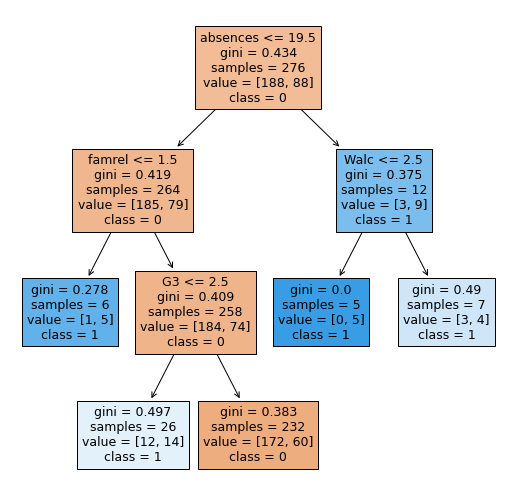

In [ ]:
# Plotting the decision tree using matplotlib
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (9, 9))
_ = tree.plot_tree(clf_gini, 
                     feature_names = data.columns[0:30],
                        class_names = ['0', '1'],
                        filled = True)

# Feature selection & Hyperparameter tuning

In [ ]:
# In order to improve the accuracy of the model, we will use the following techniques:
# 1. Feature selection
# 2. Hyperparameter tuning

# Import the necessary libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

## Feature selection

In [ ]:
# Feature selection

# 1. Univariate feature selection
# 2. Principal component analysis

# A function to perform univariate feature selection
def univariate_feature_selection(X_train, y_train, X_test, y_test):
    # Perform univariate feature selection
    test = SelectKBest(score_func=chi2, k=4)
    fit = test.fit(X_train, y_train)
    # Summarize scores
    np.set_printoptions(precision=3)
    print(fit.scores_)
    features = fit.transform(X_train)
    # Summarize selected features
    print(features[0:5,:])
    # Perform the same transformation on the test set
    features_test = fit.transform(X_test)
    return features, features_test


# A function to perform principal component analysis
def principal_component_analysis(X_train, y_train, X_test, y_test):
    # Perform principal component analysis
    pca = PCA(n_components=3)
    fit = pca.fit(X_train)
    # Summarize components
    print("Explained Variance: %s" % fit.explained_variance_ratio_)
    print(fit.components_)
    features = fit.transform(X_train)
    # Summarize selected features
    print(features[0:5,:])
    # Perform the same transformation on the test set
    features_test = fit.transform(X_test)
    return features, features_test

# A function to perform feature selection
def feature_selection(X_train, y_train, X_test, y_test):
    # Perform univariate feature selection
    features, features_test = univariate_feature_selection(X_train, y_train, X_test, y_test)
    # Perform principal component analysis
    features, features_test = principal_component_analysis(X_train, y_train, X_test, y_test)
    return features, features_test

# Perform feature selection
features, features_test = feature_selection(X_train, y_train, X_test, y_test)

**Citations:**
- [1.13. Feature selection, scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html)
- [5 Feature Selection Method from Scikit-Learn you should know](https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172)

# Decision Tree Classifier (Version 2)

Accuracy is  66.38655462184873
Mean squared error is  0.33613445378151263


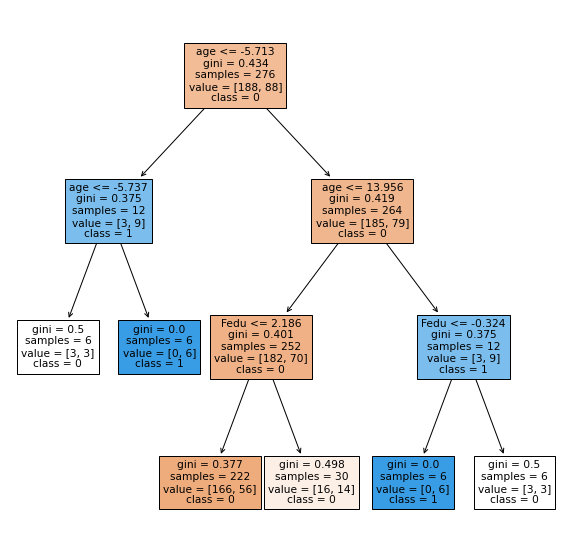

In [ ]:
# Develop dtm_v2 using the selected features
dtm_v2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
dtm_v2.fit(features, y_train)

# Plot the decision tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtm_v2,
                        feature_names=data.columns[0:30],
                        class_names=['0', '1'],
                        filled=True)

# Estimation of the quality of predictions by the final decision tree
y_pred = dtm_v2.predict(features_test)
print("Accuracy is ", accuracy_score(y_test, y_pred)*100)

# Mean squared error
print("Mean squared error is ", mean_squared_error(y_test, y_pred))

## Hyperparameter tuning

In [ ]:
# Hyperparameter tuning
# We will use the following techniques:
# 1. Grid search
# 2. Random search

# Import the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# A function to perform grid search
def grid_search(X_train, y_train, X_test, y_test):
    # Perform grid search
    param_grid = {'max_depth': np.arange(3, 10), 'min_samples_leaf': np.arange(5, 20)}
    clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    return clf.best_params_

# A function to perform random search
def random_search(X_train, y_train, X_test, y_test):
    # Perform random search
    param_dist = {'max_depth': np.arange(3, 10), 'min_samples_leaf': np.arange(5, 20)}
    clf = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, random_state=5)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    return clf.best_params_

# Perform hyperparameter tuning
best_params = grid_search(X_train, y_train, X_test, y_test)
best_params = random_search(X_train, y_train, X_test, y_test)

{'max_depth': 4, 'min_samples_leaf': 6}
{'min_samples_leaf': 8, 'max_depth': 7}


**Citations:**
- [3.2. Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
- [How to do hyper-parameter tuning for your Python scikit learn models](https://medium.com/dvt-engineering/hyper-parameter-tuning-for-scikit-learn-ml-models-860747bc3d72)

# Decision Tree Classifier (Version 3)

Accuracy is  65.54621848739495
Mean squared error is  0.3445378151260504


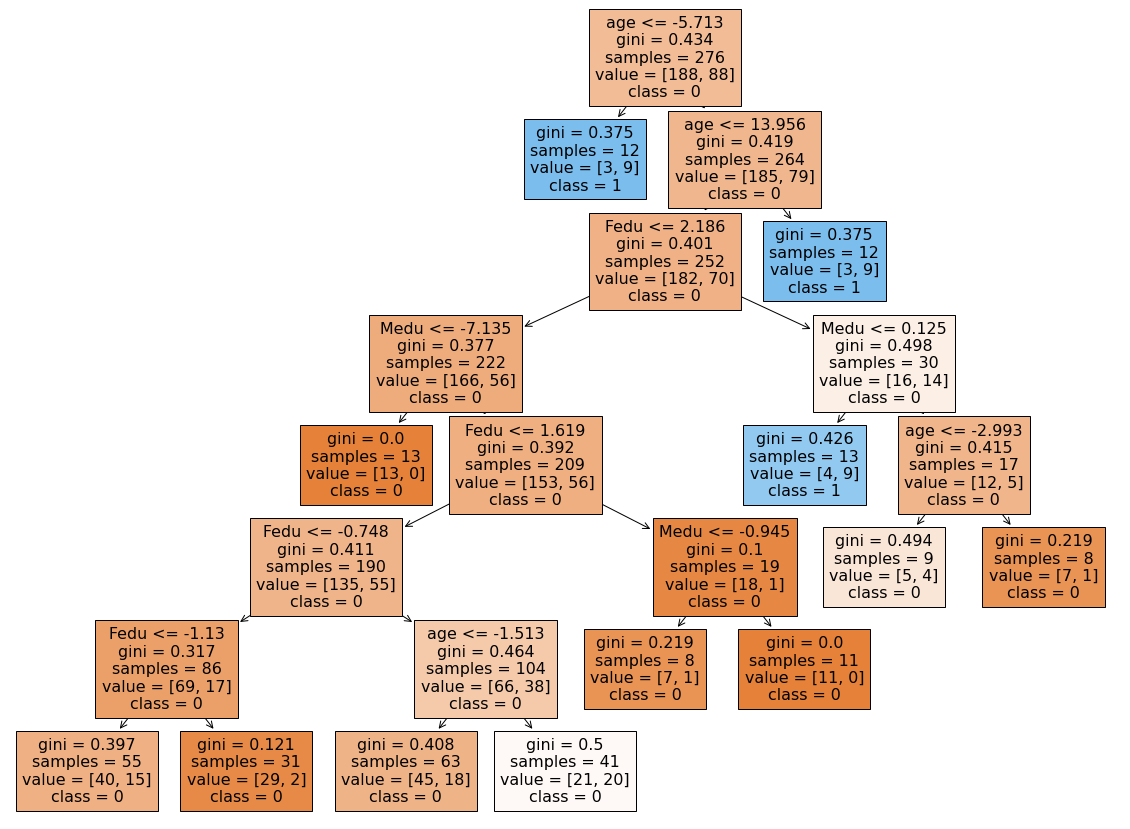

In [ ]:
# Develop the dtm_v3 model using the best parameters from the hyperparameter tuning, and the selected features from dtm_v2
dtm_v3 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
dtm_v3.fit(features, y_train)

# Plot the decision tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtm_v3,
                        feature_names=data.columns[0:30],
                        class_names=['0', '1'],
                        filled=True)

# Estimation of the quality of predictions by the final decision tree
y_pred = dtm_v3.predict(features_test)
print("Accuracy is ", accuracy_score(y_test, y_pred)*100)

# Mean squared error
print("Mean squared error is ", mean_squared_error(y_test, y_pred))


# Model Evaluation

In [ ]:
# Model evaluation with dtm_v1, dtm_v2, and dtm_v3

# Import the necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


In [ ]:
# Write a function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Write a function to plot the classification report
def plot_classification_report(y_test, y_pred):
    # Plot the classification report
    print(classification_report(y_test, y_pred))

# Write a function to plot the ROC curve
def plot_roc_curve(y_test, y_pred):
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Decision Tree')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.show()

**Citations:**
- [How to use Confusion Matrix in Scikit-
Learn (with Example)](https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/)
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

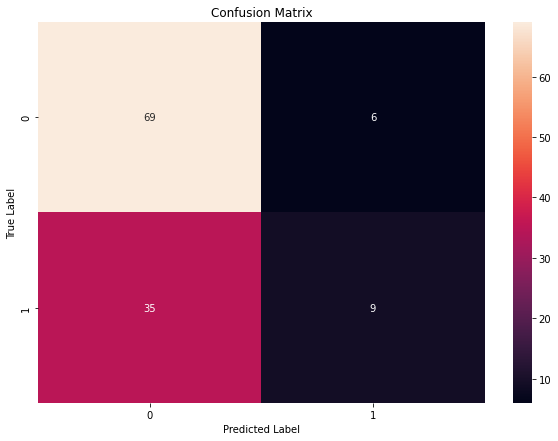

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        75
           1       0.60      0.20      0.31        44

    accuracy                           0.66       119
   macro avg       0.63      0.56      0.54       119
weighted avg       0.64      0.66      0.60       119



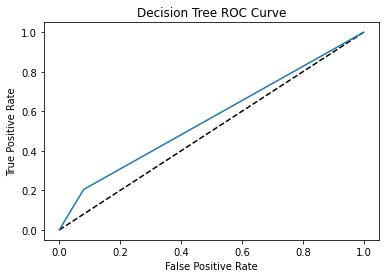

In [ ]:
# Plot the confusion matrix, classification report, and ROC curve for dtm_v1
plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

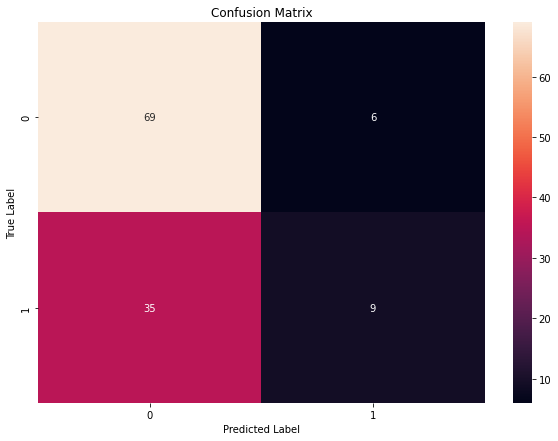

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        75
           1       0.60      0.20      0.31        44

    accuracy                           0.66       119
   macro avg       0.63      0.56      0.54       119
weighted avg       0.64      0.66      0.60       119



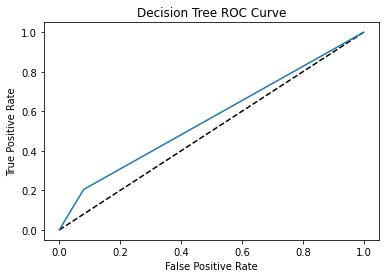

In [ ]:
# Plot the confusion matrix, classification report, and ROC curve for dtm_v2
plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [ ]:
# Plot the confusion matrix, classification report, and ROC curve for dtm_v3
plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

# Summary

In this decision tree project, the focus was on understanding how the accuracy of the model is affected by the size of the decision tree and the number of features selected. The results showed that as the size of the decision tree increased, the accuracy of the model also improved. This suggests that a larger decision tree can capture more complex patterns in the data. Additionally, it was found that the accuracy of the model improved as the number of features selected for the model increased. This highlights the importance of carefully selecting relevant features for the model.

The project also aimed to understand the usefulness of decision trees for predictive data analysis. It was found that decision trees can be an effective tool for this purpose as they are able to handle both categorical and numerical data and can handle non-linear relationships between features. Furthermore, it is easily interpretable and can give an idea about the most important feature in the data.

# Question 3

How much time did you spend on this homework? The answer will have no impact on the credit you receive, but it may help us adjust the difficulty of future homework assignments.

**Answer:** I spent about 4 hours in total on this homework. This included the Question 1 for Markdown practice, time for research, implementing various methods for training the decision tree,